In [50]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import math 
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [51]:
# Линейная регрессия некоторой зависимой переменной y на набор независимых переменных  
# x = (x₁, …, xᵣ), где r – это число предсказателей, предполагает, что линейное отношение 
# между y и x: y = 𝛽₀ + 𝛽₁x₁ + ⋯ + 𝛽ᵣxᵣ + 𝜀. Это уравнение регрессии. 𝛽₀, 𝛽₁, …, 𝛽ᵣ – коэффициенты регрессии, 
# и 𝜀 – случайная ошибка.

In [52]:
def calculate_slope(x, y):
    mx = x - x.mean()
    my = y - y.mean()
    return sum(mx * my) / sum(mx**2)

def get_params(x, y):
    a = calculate_slope(x, y)
    b = y.mean() - a * x.mean()
    return a, b

# Вычисление наклона (углового коэффициента) b
def slope(xs, ys):
    return xs.cov(ys) / xs.var() # cov(X) в случае одномерного массива возвращает дисперсию элементов массива

# Вычисление точки пересечения (с осью Y) A intercept
def intercept(xs, ys): 
    return ys.mean() - (xs.mean() * slope(xs, ys))

# Вычисление пересечения и наклона (углового коэффициента)
def slope_intercept():
    X  = ballots
    y  = population_density
    a  = intercept(X, y)
    b  = slope(X, y) 
    print('Пересечение:' ,(round(a, 2)),'\nНаклон: ',(round(b, 5)))

# Вычисление остатков
def residuals(a, b, xs, ys):# вызовы fn(a,b)(x)
    estimate = regression_line(a, b)  
    return pd.Series( map(lambda x, y: y - estimate(x), xs, ys) )

# Вычисление коэффициента детерминации
def r_squared(a, b, xs, ys):
    r_var = residuals(a, b, xs, ys).var() 
    y_var = ys.var()
    return 1 - (r_var / y_var)

# Вычисление коэффициента R-квадрат
def R():
    X  = ballots
    y  = population_density
    a, b = intercept(X, y), slope(X, y)
    return r_squared(a, b, X, y)

In [53]:
df = pd.read_csv('regression_df.csv')
display(df)

,raw_voters,reg,tik,valid_ballots,invalid_ballots,population,population_group,sum,sum_city,population_density
0,385,Алтайский край,Алтайская,174,4,37078,4,178,3529,0.05
1,988,Алтайский край,Бийская,377,15,26480,4,392,3529,0.11
2,1044,Алтайский край,Смоленская,432,11,19181,4,443,3529,0.13
3,81,Алтайский край,Чарышская,37,0,9141,4,37,3529,0.01
4,404,Алтайский край,Егорьевская,168,1,9937,4,169,3529,0.05
...,...,...,...,...,...,...,...,...,...,...
590,2419,город Санкт-Петербург,Территориальная избирательная комиссия №21,911,8,113570,5,919,8703,0.11
591,2987,город Санкт-Петербург,Территориальная избирательная комиссия №62,946,33,41072,4,979,8703,0.11
592,2753,город Санкт-Петербург,Территориальная избирательная комиссия №27,831,17,90854,5,848,8703,0.10
593,2540,город Санкт-Петербург,Территориальная избирательная комиссия №59,933,12,70213,5,945,8703,0.11


In [54]:
# Конвертируем столбцы фрейма в массивы для вычислений

population_density=np.array(df['population_density'])
ballots=np.array(df['sum'])

In [55]:
# Для удобства задаем короткие переменные с массивами

x = ballots
y = population_density

In [61]:
# Получаем параметры через ранее созданную функцию через массивы бюллетеней по регионам и плотность населения

a, b = get_params(x, y)

In [57]:
# Через параметры вычисляем линейную регрессию для её передачи в построение графика

lin_reg = a*x + b

In [58]:
population_density=(df['population_density'])
ballots=(df['sum'])
x = ballots
y = population_density

In [59]:
print('b0: ',round(intercept(ballots, population_density),4))
print('b1: ',round(slope(ballots, population_density),6))

b0:  0.0482
b1:  0.000159


In [60]:
# Примерное значение b₀ = 0.0482 показывает, что наша модель предсказывает ответ 0.0482 при x, равном нулю. 
# Равенство b₁ = 0.000159 означает, что предсказанный ответ возрастает до 0.000159 при x, увеличенным на единицу.

In [35]:
regression_line = lambda a, b: lambda x: a + (b * x)

Пересечение: 0.05 
Наклон:  0.00016
Коэффициент R-квадрат: 0.18245788253489514


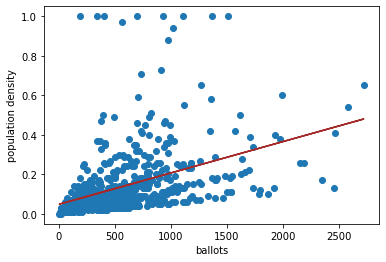

In [36]:
plt.xlabel('ballots')
plt.ylabel('population density')
plt.scatter(x, y)
plt.plot(x, lin_reg, color='brown')

slope_intercept()
print('Коэффициент R-квадрат:', R())